**Train a Machine Learning Model**
---

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("D:/projects/classic learn/data_analysis/hr_dashboard_data.csv")


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Select features and target
features = df[['Productivity (%)', 'Satisfaction Rate (%)', 'Projects Completed', 'Salary']]
target = df['Productivity (%)']  # Assume we created this metric


In [16]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [17]:

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:

# Train RandomForest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [19]:

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Model Evaluation - MAE: {mae:.2f}, MSE: {mse:.2f}")


Model Evaluation - MAE: 0.42, MSE: 0.40


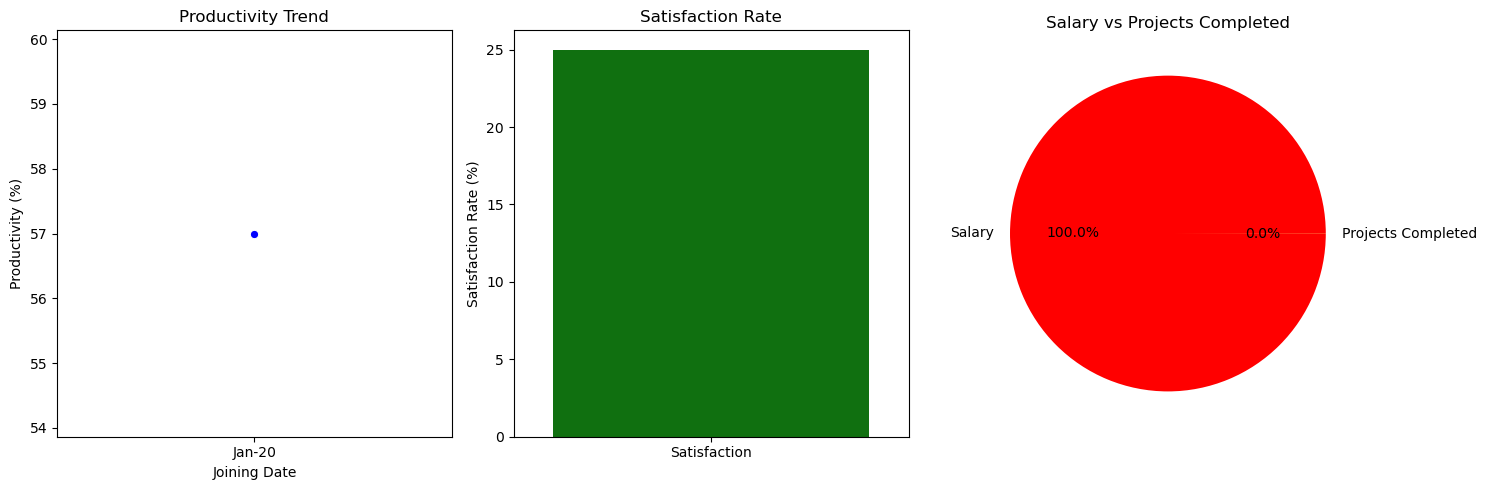

In [20]:
#---Generate Employee Performance Visualizations---#

import matplotlib.pyplot as plt
import seaborn as sns

def plot_employee_performance(employee_name):
    emp = df[df['Name'] == employee_name]  # Filter employee data

    if emp.empty:
        print(f"No data found for employee: {employee_name}")
        return

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    # Productivity Trend
    sns.lineplot(x=emp['Joining Date'], y=emp['Productivity (%)'], ax=ax[0], marker="o", color="b")
    ax[0].set_title("Productivity Trend")
    
    # Satisfaction Rate
    sns.barplot(x=["Satisfaction"], y=emp['Satisfaction Rate (%)'], ax=ax[1], color="g")
    ax[1].set_title("Satisfaction Rate")

    # Salary & Completed Tasks Pie Chart
    labels = ["Salary", "Projects Completed"]
    values = [emp['Salary'].values[0], emp['Projects Completed'].values[0]]
    ax[2].pie(values, labels=labels, autopct="%1.1f%%", colors=["red", "orange"])
    ax[2].set_title("Salary vs Projects Completed")

    plt.tight_layout()
    plt.show()

# Example: Visualizing an employee's performance
plot_employee_performance(employee_name='Douglas Lindsey')


In [21]:
#---Forecast Future Employee Performance---#

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Example future input
future_data = [[85, 90, 50, 70000]]  # Example future input

# Assuming the scaler and model are already defined and fitted
# Example feature names
feature_names = ['Productivity (%)', 'Satisfaction Rate (%)', 'Projects Completed', 'Salary']

# Convert future data to DataFrame with feature names
future_data_df = pd.DataFrame(future_data, columns=feature_names)

# Scale the future data
future_data_scaled = scaler.transform(future_data_df)

# Predict performance
predicted_performance = model.predict(future_data_scaled)
print(f"Predicted Employee Performance Score: {predicted_performance[0]:.2f}")

Predicted Employee Performance Score: 84.67
